In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [22]:
#Read train data
train_data=pd.read_csv('/content/1train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#No.of Train data's row and column
train_data.shape

(42000, 785)

In [24]:
#Read test data
test_data=pd.read_csv('/content/1test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#NO. of Test data's row and column
test_data.shape

(28000, 784)

In [26]:
test_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_data.shape

(28000, 784)

**Viewing a random data from train_data and check with its label**

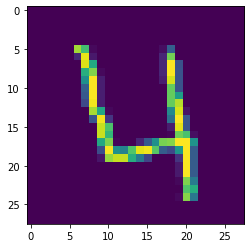

In [28]:
#viewing the 4th row of train_data
a=train_data.iloc[3,1:].values
a=a.reshape(28,28)
plt.imshow(a)

In [29]:
#Label of 4th row
train_data.iloc[3,0]

4

**Using Random Classifier to build a model to predict the output of test_data.**

In [30]:
x=train_data.iloc[:,1:]
y=train_data.iloc[:,0]

In [31]:
#Creating training and testing samples from train_data with a ratio of 8:2(train:test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
x_train.shape ,x_test.shape


((33600, 784), (8400, 784))

In [32]:
model=RandomForestClassifier(n_estimators=200,max_samples=0.5) # n_estimators=The number of trees in the forest.,max_samplesint or float, default=None
model.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=200)

In [33]:
#Predicting the testing sample of train_data
pred=model.predict(x_test)

In [34]:
#accuracy of training sample of train_data
model.score(x_train,y_train)

0.9991666666666666

In [35]:
#accuracy of testing sample of train_data
model.score(x_test,y_test)

0.9608333333333333

In [36]:
confusion_matrix(pred,y_test)

array([[804,   0,   3,   2,   1,   1,   6,   1,   2,   2],
       [  0, 902,   4,   1,   0,   1,   1,   3,   5,   3],
       [  1,   3, 810,   8,   1,   3,   1,  12,   4,   4],
       [  0,   0,   4, 876,   0,  10,   0,   2,   8,  16],
       [  1,   1,  10,   1, 814,   1,   1,   7,   5,  10],
       [  1,   2,   1,  18,   0, 666,   1,   1,   3,   2],
       [  5,   1,   5,   0,   6,   8, 770,   0,   4,   0],
       [  0,   0,   5,  10,   2,   1,   0, 847,   2,   9],
       [  3,   0,   4,  10,   0,   5,   5,   2, 795,   5],
       [  1,   0,   0,  11,  15,   6,   0,  18,   7, 787]])

**Now we will crosscheck 5 values from the testing sample of train_data with predicted data**

In [37]:
#first 5 values of testing sample of train_data
y_test[0:5]

5457     8
38509    1
25536    9
31803    9
39863    8
Name: label, dtype: int64

In [38]:
#first 5 values of predicting samples
pred[0:5]

array([8, 1, 9, 9, 8])

observation :Thus we can see that the model is predicting accurately all the five data.


**Now we can predict the output for the test_data using the above model**

In [39]:
prediction=model.predict(test_data)
prediction

array([2, 0, 9, ..., 3, 9, 2])

In [40]:
prediction.shape

(28000,)

**Now we will first visualize some rows of test_data using matplot library and then check that image with the value of our predicted data**

1. Example

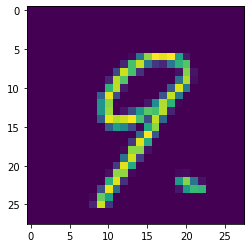

In [41]:
#Visualizing the 3rd row of test_data
b=test_data.iloc[2,0:].values
b=b.reshape(28,28)
plt.imshow(b)

In [42]:
#The 3rd value of prediction data
prediction[3]

9

2. Example

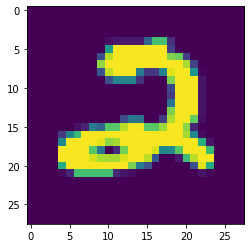

In [43]:
#Visualizing the 1st row of test_data
b1=test_data.iloc[0,0:].values
b1=b1.reshape(28,28)
plt.imshow(b1)

In [44]:
#The 1st value of prediction data
prediction[0]

2

Here both the data are predicted correctly. Hence we can say that the model is pretty much useful in predicting handwritten digit.

Now predicting with new sample

In [84]:
import cv2

In [89]:
img=cv2.imread('/content/5.PNG')

In [90]:
img.shape

(235, 246, 3)

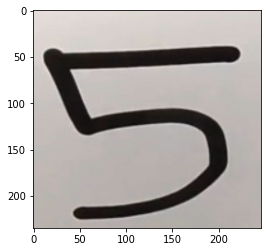

In [91]:
plt.imshow(img)

Here size need to resized as per dataset (28*28).

Also it is a colour image , need to convert into gray image